In [1]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

BASE_PATH = "/content/drive/MyDrive/KAIST/finance_ai/term_project/data"

meta_data = pd.read_csv(f"{BASE_PATH}/meta_data.csv")
meta_data["종목코드"]

0      120110
1         150
2       24720
3       24720
4        4560
        ...  
141      4990
142    267260
143      1740
144      5930
145      9440
Name: 종목코드, Length: 146, dtype: int64

In [4]:
df = pd.read_csv(f"{BASE_PATH}/stock_prices_daily_2023.csv")
df

<ipython-input-4-6d9f7dfa3ffa>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{BASE_PATH}/stock_prices_daily_2023.csv")


,Ticker,1996-11-01,1996-11-02,1996-11-04,1996-11-05,1996-11-06,1996-11-07,1996-11-08,1996-11-09,1996-11-11,...,2023-12-14,2023-12-15,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28
0,000020,5007.0,5116.0,4819.0,4538.0,4694.0,4538.0,4272.0,4021.0,3990.0,...,9810.0,9770.0,9730.0,9760.0,9870.0,9730.0,9920.0,9960.0,9920.0,10270.0
1,000040,3041217.0,3221178.0,3167197.0,3167197.0,3113219.0,2951254.0,2789293.0,2627332.0,2555354.0,...,1050.0,1073.0,1061.0,1058.0,1052.0,1046.0,1027.0,986.0,998.0,1032.0
2,000050,3957.0,3923.0,3874.0,3655.0,3518.0,3518.0,3525.0,3696.0,3566.0,...,8670.0,9140.0,8830.0,8820.0,8750.0,8740.0,8920.0,8830.0,8820.0,8840.0
3,000070,25209.0,25296.0,23818.0,22601.0,23471.0,23035.0,21731.0,20427.0,20863.0,...,68500.0,68900.0,69200.0,70500.0,71000.0,70300.0,70000.0,70000.0,68800.0,69000.0
4,000075,12482.0,12702.0,12039.0,12039.0,12039.0,11819.0,12370.0,11819.0,11376.0,...,54300.0,53500.0,53500.0,54200.0,54200.0,54400.0,54500.0,54000.0,52600.0,53000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,460860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11970.0,12000.0,12350.0,13030.0,13100.0,13360.0,13210.0,13070.0,12250.0,12040.0
946,462520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21050.0,20800.0,21150.0,20900.0,21200.0,21250.0,20850.0,20700.0,20750.0,21250.0
947,465770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13310.0,12950.0,13890.0,13530.0,13610.0,13150.0,12980.0,12220.0,12300.0,12330.0
948,900140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2590.0,2580.0,2570.0,2520.0,2560.0,2650.0,2620.0,2545.0,2555.0,2525.0


In [5]:
!pip install pykrx

In [6]:
# meta_data["종목코드"] 안에 있는 종목코드만 df에서 가져오기
df_ticker = df[df["Ticker"].isin(meta_data["종목코드"].astype(str).str.zfill(6))]
df_ticker

,Ticker,1996-11-01,1996-11-02,1996-11-04,1996-11-05,1996-11-06,1996-11-07,1996-11-08,1996-11-09,1996-11-11,...,2023-12-14,2023-12-15,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28
3,000070,25209.0,25296.0,23818.0,22601.0,23471.0,23035.0,21731.0,20427.0,20863.0,...,68500.0,68900.0,69200.0,70500.0,71000.0,70300.0,70000.0,70000.0,68800.0,69000.0
5,000080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23350.0,23100.0,23200.0,23350.0,23450.0,23300.0,23150.0,23350.0,22000.0,22500.0
7,000100,2859.0,2890.0,2726.0,2564.0,2638.0,2545.0,2450.0,2393.0,2450.0,...,61444.0,61253.0,61827.0,62593.0,62784.0,62497.0,65751.0,66900.0,67900.0,68800.0
12,000150,20956.0,22208.0,22208.0,20890.0,22143.0,23461.0,22143.0,20825.0,19638.0,...,89500.0,90900.0,91700.0,92400.0,95100.0,94100.0,92000.0,92200.0,91700.0,93900.0
16,000210,7434.0,7507.0,7434.0,7230.0,7507.0,7580.0,7288.0,7069.0,7434.0,...,48150.0,49800.0,50300.0,50300.0,51200.0,51800.0,52400.0,51800.0,51100.0,51400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,323410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26850.0,27100.0,26900.0,26250.0,27400.0,27500.0,27200.0,27450.0,27700.0,28500.0
890,336260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22700.0,22550.0,22500.0,22050.0,22350.0,22500.0,22150.0,22500.0,22800.0,23200.0
901,352820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,233000.0,238500.0,241500.0,239000.0,234500.0,230500.0,230000.0,226500.0,231500.0,233500.0
913,375500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37850.0,37650.0,36900.0,36200.0,37150.0,36700.0,36700.0,36600.0,35900.0,36050.0


In [7]:
meta_data["종목코드"] = meta_data["종목코드"].astype(str).str.zfill(6)

In [8]:
from pykrx import stock


for idx, row in df_ticker.iterrows():
    print(stock.get_market_ticker_name(row["Ticker"]))

삼양홀딩스
하이트진로
유한양행
두산
DL
기아
한화손해보험
동아쏘시오홀딩스
현대건설
한화
DB하이텍
동국홀딩스
세아베스틸지주
SK증권
종근당홀딩스
SK네트웍스
넥센타이어
한일홀딩스
대한항공
한화투자증권
LG
포스코퓨처엠
보령
롯데정밀화학
신세계
세방
세방전지
깨끗한나라
현대비앤지스틸
효성
성신양회
롯데지주
SGC에너지
에스엘
삼성전자
NH투자증권
한일현대시멘트
GS리테일
오뚜기
삼성전기
한샘
E1
삼성에스디에스
SK가스
한온시스템
롯데쇼핑
기업은행
콜마홀딩스
팬오션
교보증권
LG유플러스
삼성생명
두산에너빌리티
LG디스플레이
SK
강원랜드
NAVER
카카오
한국가스공사
엔씨소프트
LG헬로비전
포스코인터내셔널
한국항공우주
한전KPS
LG생활건강
LG화학
락앤락
코오롱인더
한미약품
BNK금융지주
DGB금융지주
이마트
삼양사
한국타이어앤테크놀로지
한국콜마
JB금융지주
한진칼
HL만도
삼성바이오로직스
넷마블
HD현대일렉트릭
HD현대건설기계
한화시스템
삼양패키징
BGF리테일
롯데이노베이트
HDC현대산업개발
효성화학
효성티앤씨
효성첨단소재
한일시멘트
세아제강
우리금융지주
HD현대에너지솔루션
카카오뱅크
두산퓨얼셀
하이브
DL이앤씨
카카오페이


In [9]:
df_ticker.set_index('Ticker', inplace=True)
df_ticker = df_ticker.T
start_date = '1997-01-01'
end_date = '2001-08-23'
df_ticker = df_ticker.loc[start_date:end_date]
df_ticker = df_ticker.T
df_ticker

,1997-01-03,1997-01-04,1997-01-06,1997-01-07,1997-01-08,1997-01-09,1997-01-10,1997-01-11,1997-01-13,1997-01-14,...,2001-08-09,2001-08-10,2001-08-13,2001-08-14,2001-08-16,2001-08-17,2001-08-20,2001-08-21,2001-08-22,2001-08-23
Ticker,,,,,,,,,,,,,,,,,,,,,
000070,20514.0,19124.0,17646.0,16255.0,16516.0,16951.0,17733.0,17994.0,18081.0,18602.0,...,12263.0,12416.0,13081.0,12774.0,12774.0,12621.0,12519.0,12570.0,12723.0,12774.0
000080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000100,2042.0,2042.0,1881.0,1734.0,1729.0,1825.0,1963.0,2009.0,1978.0,2099.0,...,5497.0,5426.0,5382.0,5426.0,5612.0,5621.0,5531.0,5525.0,5514.0,5612.0
000150,27876.0,27678.0,25569.0,25569.0,26031.0,27019.0,29128.0,31434.0,32884.0,32159.0,...,14309.0,14269.0,14430.0,14711.0,14631.0,14791.0,14229.0,14148.0,13827.0,13987.0
000210,6105.0,6326.0,6250.0,6250.0,6478.0,6707.0,6631.0,6631.0,6616.0,6783.0,...,8801.0,8801.0,9217.0,9217.0,9759.0,9172.0,8855.0,9081.0,9307.0,9036.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_ticker.dropna(axis=0, how='any', inplace=True)
df_ticker

,1997-01-03,1997-01-04,1997-01-06,1997-01-07,1997-01-08,1997-01-09,1997-01-10,1997-01-11,1997-01-13,1997-01-14,...,2001-08-09,2001-08-10,2001-08-13,2001-08-14,2001-08-16,2001-08-17,2001-08-20,2001-08-21,2001-08-22,2001-08-23
Ticker,,,,,,,,,,,,,,,,,,,,,
000070,20514.0,19124.0,17646.0,16255.0,16516.0,16951.0,17733.0,17994.0,18081.0,18602.0,...,12263.0,12416.0,13081.0,12774.0,12774.0,12621.0,12519.0,12570.0,12723.0,12774.0
000100,2042.0,2042.0,1881.0,1734.0,1729.0,1825.0,1963.0,2009.0,1978.0,2099.0,...,5497.0,5426.0,5382.0,5426.0,5612.0,5621.0,5531.0,5525.0,5514.0,5612.0
000150,27876.0,27678.0,25569.0,25569.0,26031.0,27019.0,29128.0,31434.0,32884.0,32159.0,...,14309.0,14269.0,14430.0,14711.0,14631.0,14791.0,14229.0,14148.0,13827.0,13987.0
000210,6105.0,6326.0,6250.0,6250.0,6478.0,6707.0,6631.0,6631.0,6616.0,6783.0,...,8801.0,8801.0,9217.0,9217.0,9759.0,9172.0,8855.0,9081.0,9307.0,9036.0
000270,150139.0,149261.0,145749.0,141359.0,149261.0,145749.0,144871.0,145749.0,138725.0,141359.0,...,8360.0,8340.0,8350.0,8540.0,8560.0,8570.0,8480.0,8600.0,8600.0,8600.0
000370,44963.0,43757.0,42550.0,41343.0,43757.0,43757.0,43757.0,46775.0,46473.0,42852.0,...,13997.0,14227.0,14856.0,14856.0,14954.0,15020.0,15350.0,16010.0,16175.0,15581.0
000640,8940.0,8662.0,8440.0,8385.0,8052.0,8440.0,8551.0,8717.0,8329.0,8885.0,...,10812.0,10966.0,10966.0,11181.0,11181.0,11088.0,11120.0,11181.0,11120.0,11181.0
000720,942733.0,988057.0,992589.0,956330.0,1019784.0,1033381.0,1010719.0,1019784.0,1015252.0,1033381.0,...,29274.0,28943.0,33251.0,34246.0,39382.0,43856.0,41757.0,45292.0,44077.0,40763.0
000880,6673.0,6540.0,6259.0,6329.0,6048.0,6294.0,6364.0,6610.0,6610.0,6751.0,...,2544.0,2607.0,2646.0,2753.0,2753.0,2695.0,2573.0,2597.0,2583.0,2558.0


In [11]:
df_cor = df_ticker.T.corr()
df_cor

Ticker,000070,000100,000150,000210,000270,000370,000640,000720,000880,000990,...,004980,004990,005090,005850,005930,005940,006390,007310,009150,018880
Ticker,,,,,,,,,,,,,,,,,,,,,
000070,1.000000,0.368716,0.733655,0.730019,0.465117,0.857486,0.571946,0.682533,0.907096,0.854674,...,0.772879,0.627559,0.614103,0.932985,0.008989,0.513205,0.690407,0.704779,0.101874,0.473429
000100,0.368716,1.000000,0.292706,0.565303,-0.201905,0.042842,0.480081,-0.266591,0.172821,0.173803,...,0.008862,0.679662,0.047772,0.303714,0.473578,0.303132,-0.067138,-0.134399,0.403904,0.521826
000150,0.733655,0.292706,1.000000,0.823002,0.102590,0.671311,0.377575,0.464947,0.718559,0.525284,...,0.432674,0.604496,0.273543,0.787663,0.203398,0.679497,0.380773,0.296599,0.364817,0.716696
000210,0.730019,0.565303,0.823002,1.000000,-0.077387,0.610176,0.469246,0.258664,0.688375,0.434062,...,0.321226,0.780618,0.215988,0.780404,0.370398,0.787571,0.270547,0.212270,0.513355,0.867700
000270,0.465117,-0.201905,0.102590,-0.077387,1.000000,0.488200,0.151588,0.793706,0.545062,0.780723,...,0.743135,0.028668,0.762593,0.436844,-0.545033,-0.305366,0.817506,0.740692,-0.536278,-0.306499
000370,0.857486,0.042842,0.671311,0.610176,0.488200,1.000000,0.203699,0.829861,0.837765,0.746141,...,0.814807,0.393902,0.562235,0.871385,-0.323782,0.445573,0.733565,0.771664,-0.193869,0.315570
000640,0.571946,0.480081,0.377575,0.469246,0.151588,0.203699,1.000000,0.158785,0.568085,0.468619,...,0.233536,0.602133,0.424190,0.505634,0.555761,0.503874,0.320093,0.227903,0.563494,0.465625
000720,0.682533,-0.266591,0.464947,0.258664,0.793706,0.829861,0.158785,1.000000,0.765768,0.804926,...,0.881951,0.175049,0.719372,0.698315,-0.501520,0.133089,0.900906,0.859268,-0.384049,-0.004412
000880,0.907096,0.172821,0.718559,0.688375,0.545062,0.837765,0.568085,0.765768,1.000000,0.842688,...,0.754765,0.534269,0.685186,0.922360,0.005534,0.559848,0.749787,0.707671,0.137938,0.474323


In [12]:
import numpy as np

# 상관계수를 거리로 변환
distances = np.sqrt(2 * (1 - df_cor))

In [13]:
mapping = {ticker: stock.get_market_ticker_name(ticker) for ticker in df_cor.columns}
mapping_with_sector = {ticker: f"{stock.get_market_ticker_name(ticker)}_{meta_data.loc[meta_data['종목코드'] == ticker, '업종명'].values[0]}" for ticker in df_cor.columns}

In [14]:
df_ticker.index

Index(['000070', '000100', '000150', '000210', '000270', '000370', '000640',
       '000720', '000880', '000990', '001230', '001430', '001510', '001630',
       '001740', '002350', '003300', '003490', '003530', '003550', '003850',
       '004000', '004170', '004360', '004490', '004540', '004560', '004800',
       '004980', '004990', '005090', '005850', '005930', '005940', '006390',
       '007310', '009150', '018880'],
      dtype='object', name='Ticker')

<ipython-input-15-ce63d859de60>:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(unique_sectors))  # tab20 컬러맵 사용


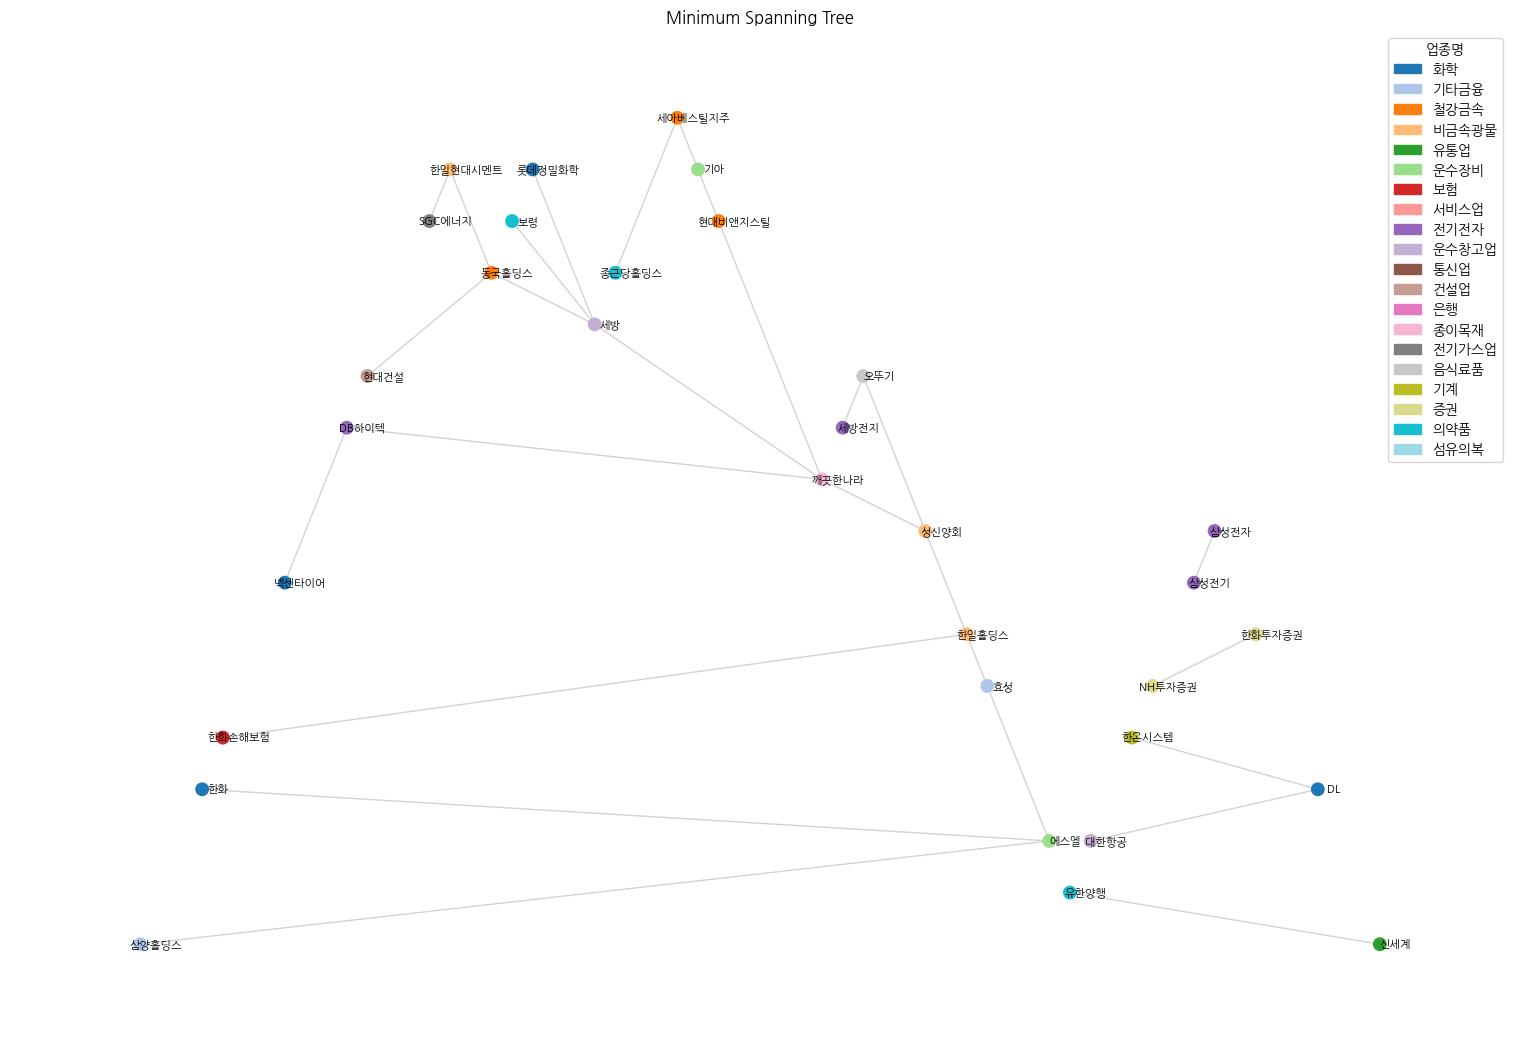

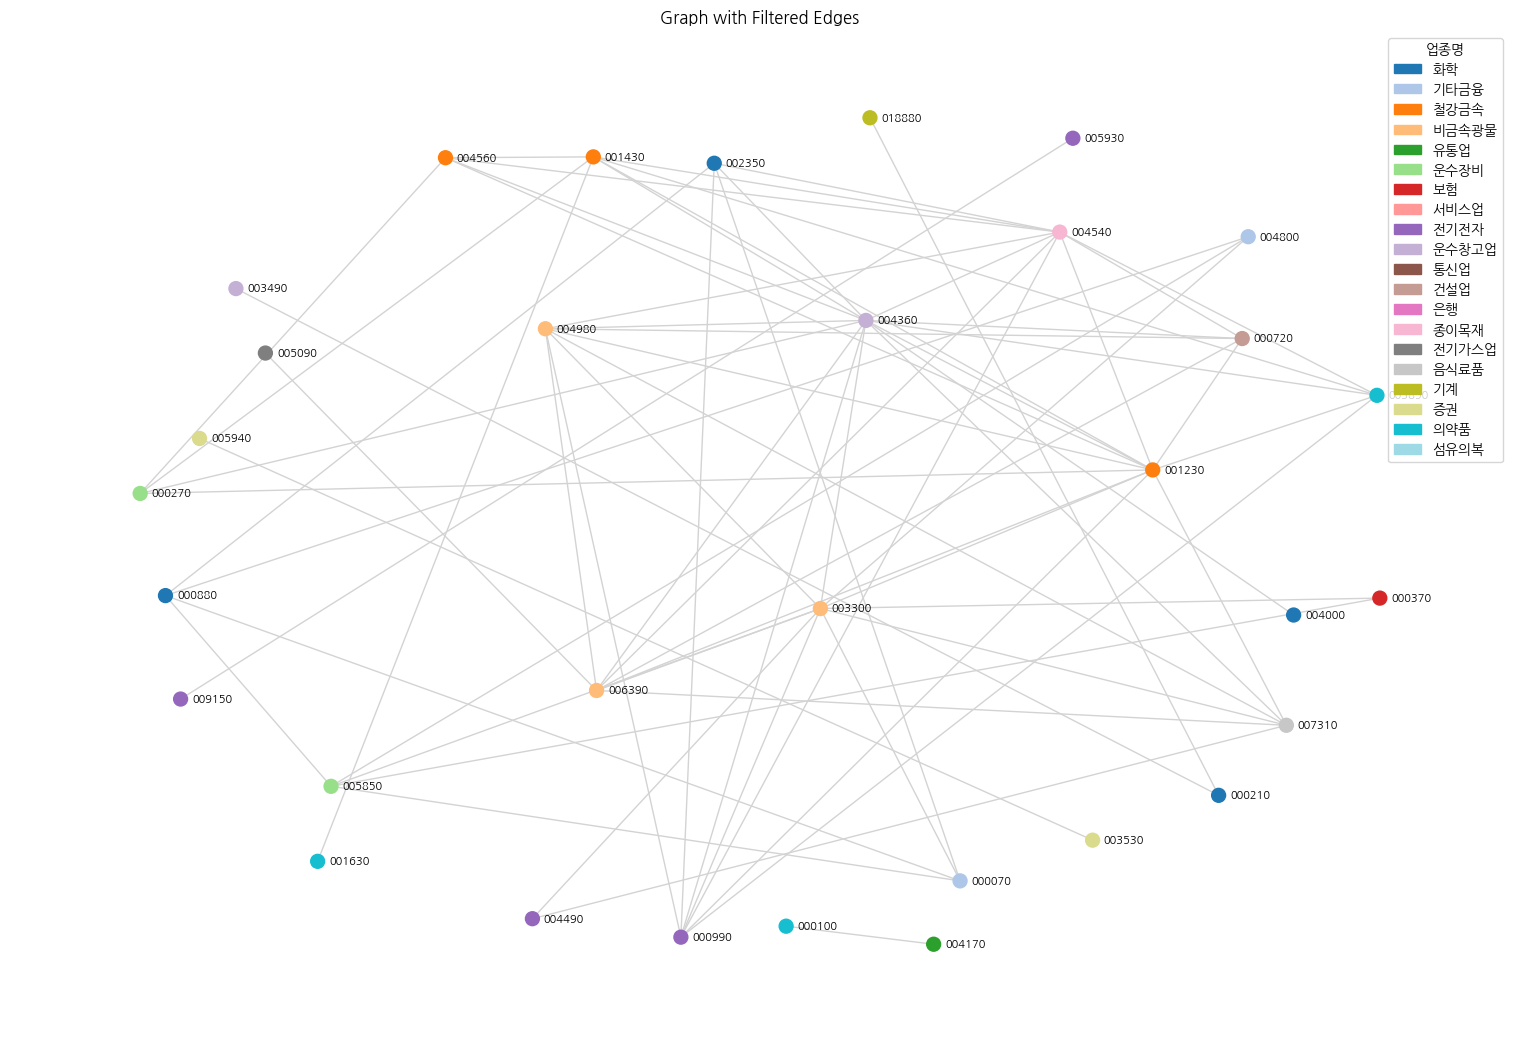

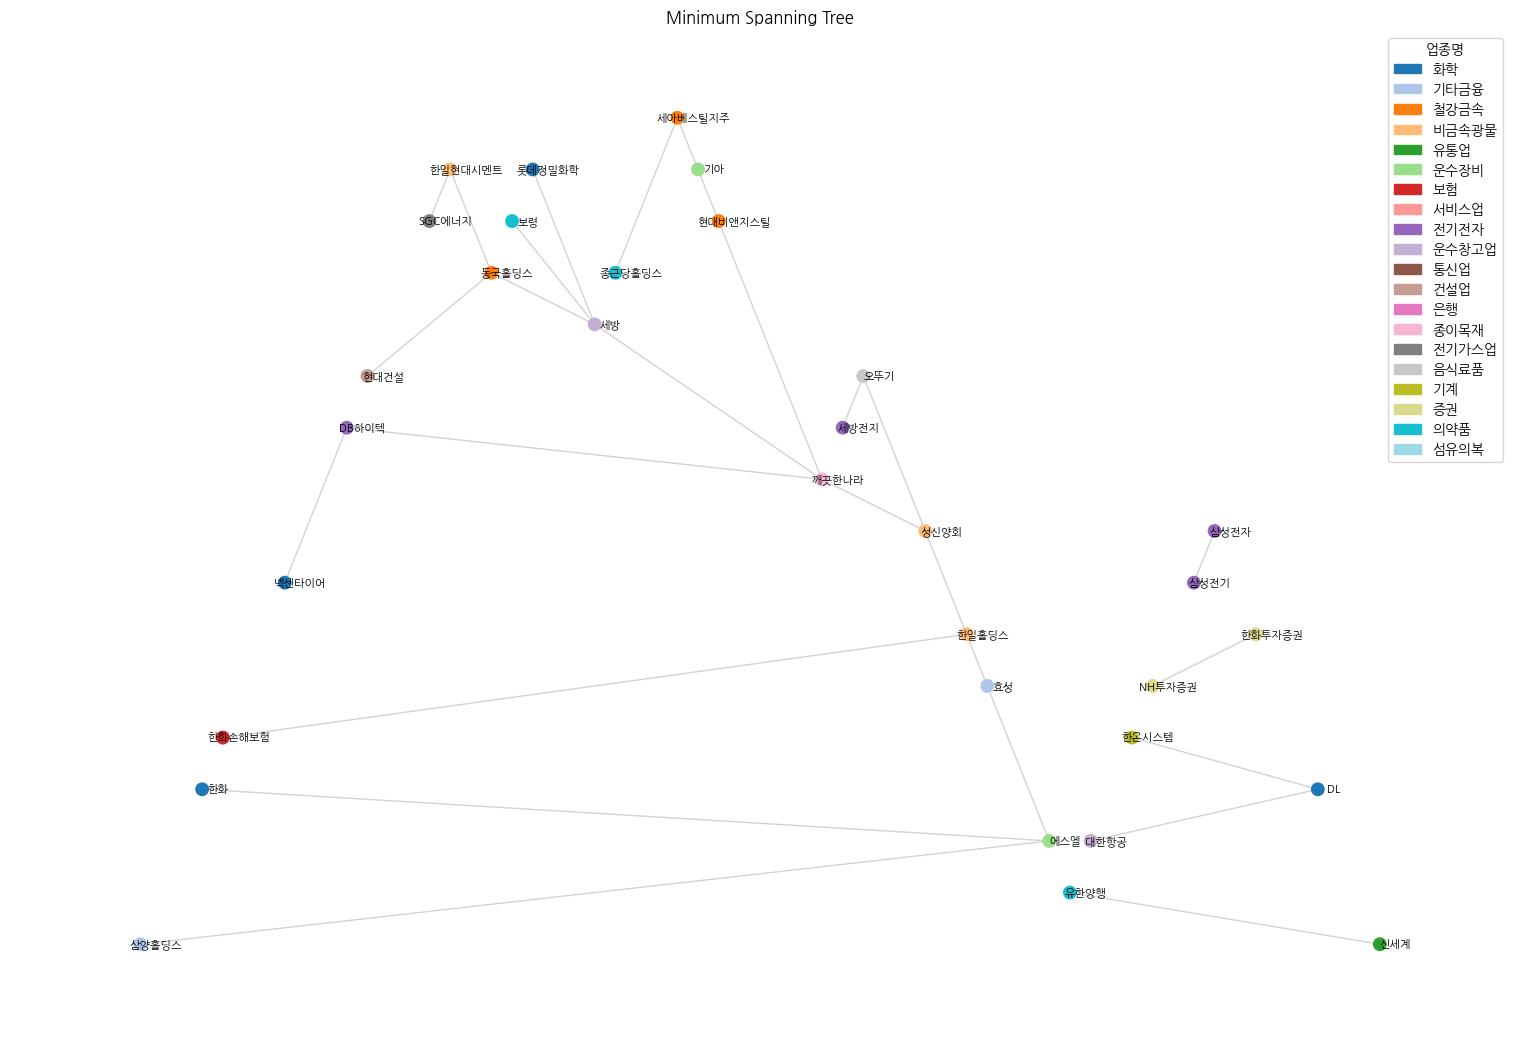

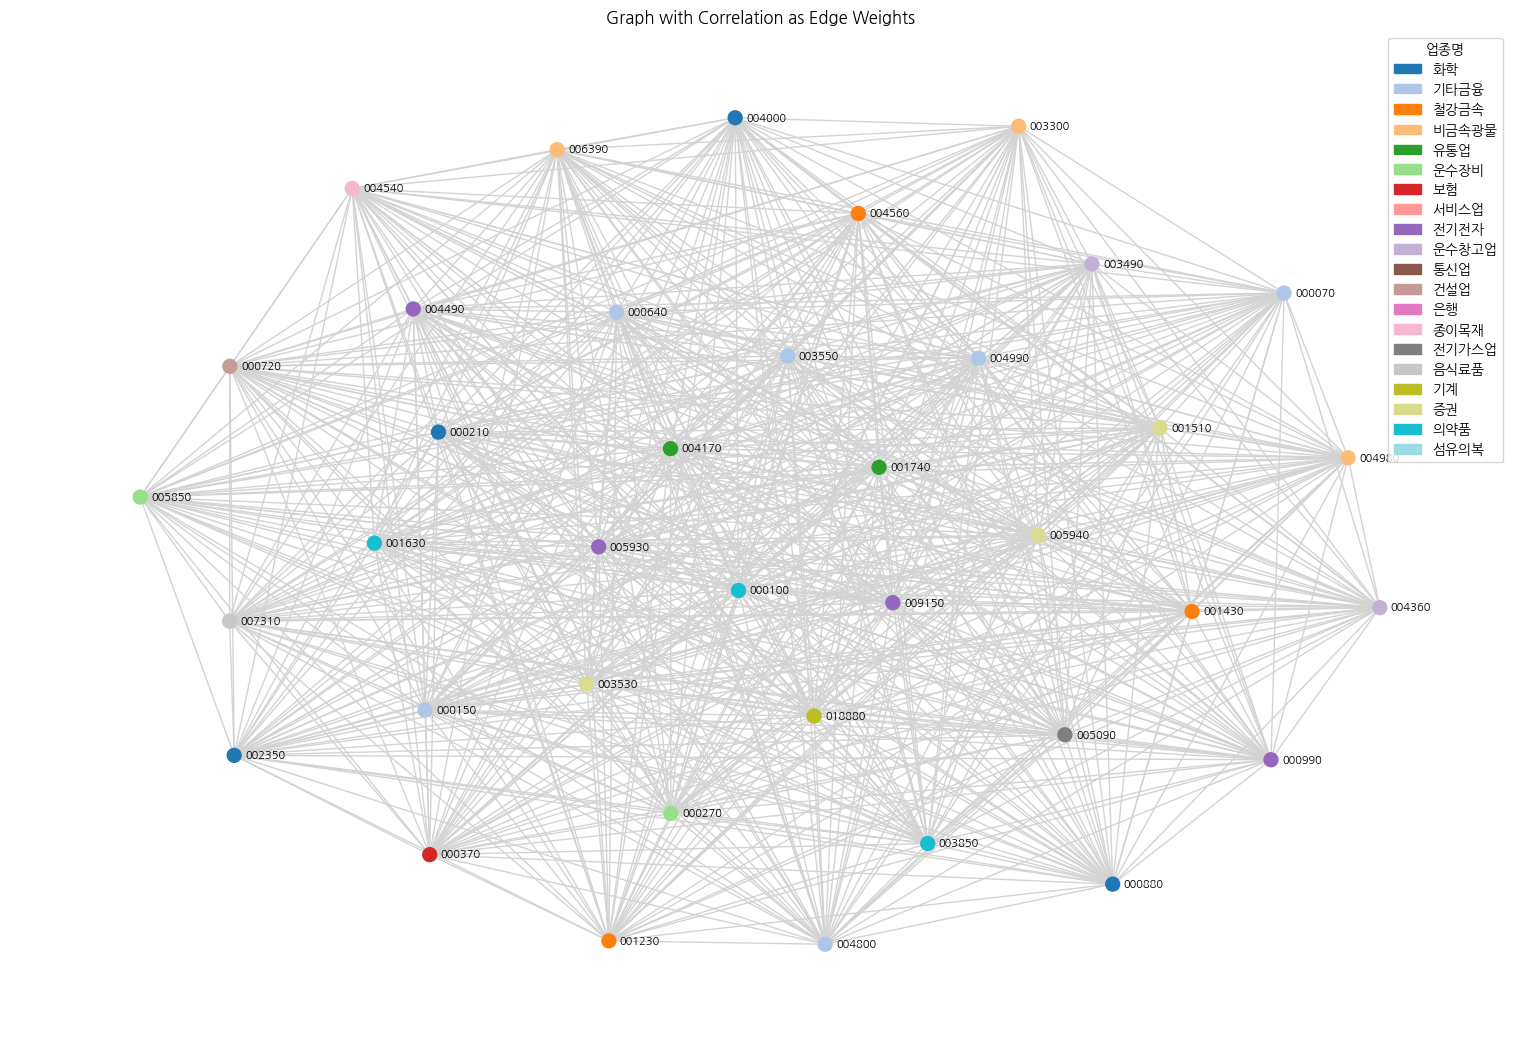

In [15]:
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches


# MST 생성 및 시각화 함수
def create_graph_with_correlation(corr_matrix, filtered_edge=True):
    # 상관계수를 거리로 변환
    distances = np.sqrt(2 * (1 - corr_matrix))

    # Nanum 폰트를 Matplotlib에 설정
    plt.rc('font', family='NanumGothic')

    # 그래프 생성
    G = nx.Graph()

    # 노드 추가
    for node in corr_matrix.columns:
        sector = meta_data.loc[meta_data['종목코드'] == node, '업종명'].values[0]
        G.add_node(node, sector=sector)

    # Add edges
    edges = []
    for i in range(len(distances)):
        for j in range(i + 1, len(distances)):
            edges.append((distances.index[i], distances.columns[j], distances.iloc[i, j]))

    if filtered_edge:
        # Select bottom 10% edges by weight
        edges = sorted(edges, key=lambda x: x[2])
        num_edges_to_select = int(len(edges) * 0.1)
        selected_edges = edges[:num_edges_to_select]

        # Add selected edges to graph
        for edge in selected_edges:
            G.add_edge(edge[0], edge[1], weight=edge[2])
    else:
        # Add all edges to graph
        for edge in edges:
            G.add_edge(edge[0], edge[1], weight=edge[2])

    return G, filtered_edge

# 섹터별 색상 자동 설정
unique_sectors = meta_data['업종명'].unique()
colors = cm.get_cmap('tab20', len(unique_sectors))  # tab20 컬러맵 사용

sector_colors = {sector: colors(i) for i, sector in enumerate(unique_sectors)}
legend_patches = [mpatches.Patch(color=sector_colors[sector], label=sector) for sector in unique_sectors]

# 노드 색상 설정 함수
def get_node_colors(nodes):
    return [sector_colors[meta_data.loc[meta_data['종목코드'] == node, '업종명'].values[0]] for node in nodes]

def create_mst(G):
    # MST 생성
    mst = nx.minimum_spanning_tree(G, weight='weight')
    return mst

def plot_mst(mst):
    # 네트워크 레이아웃 설정
    node_colors = get_node_colors(mst.nodes)
    mst = nx.relabel_nodes(mst, mapping)

    pos = nx.planar_layout(mst, scale=2) # 엣지 교차를 줄이기 위해 planar_layout 사용

    # 시각화
    plt.figure(figsize=(15, 10))
    labels = {node: node for node in mst.nodes}
    nx.draw(mst, pos, with_labels=False, node_size=80,
            node_color=node_colors, edge_color='lightgray',
            font_size=10, font_weight='bold', font_family='NanumGothic')

    for p in pos:  # 라벨을 노드 옆에 배치
        pos[p][0] += 0.05

    nx.draw_networkx_labels(mst, pos, labels, font_size=8, font_family='NanumGothic')

    plt.title("Minimum Spanning Tree")
    plt.legend(handles=legend_patches, loc='best', title='업종명')

    plt.show()

def plot_graph(G, filtered_edge=True):
    # 시각화
    node_colors = get_node_colors(G.nodes)
    plt.figure(figsize=(15, 10))
    pos = nx.spring_layout(G, k=2)  # k 값을 조정하여 노드 간 거리 조정
    labels = {node: node for node in G.nodes}

    nx.draw(G, pos, with_labels=False, node_size=100,
            node_color=node_colors, edge_color='lightgray',
            font_size=10, font_weight='bold', font_family='NanumGothic')

    for p in pos:  # 라벨을 노드 옆에 배치
        pos[p][0] += 0.05

    nx.draw_networkx_labels(G, pos, labels, font_size=8, font_family='NanumGothic')

    if filtered_edge:
        plt.title('Graph with Filtered Edges')
    else:
        plt.title('Graph with Correlation as Edge Weights')
    plt.legend(handles=legend_patches, loc='best', title='업종명')
    plt.show()

def remove_unconnected_nodes(G):
    # 연결되지 않은 노드 제거
    G.remove_nodes_from(list(nx.isolates(G)))

corr_matrix = df_ticker.T.corr()
G, filtered_edge = create_graph_with_correlation(corr_matrix, filtered_edge=True)
remove_unconnected_nodes(G)
mst = create_mst(G)
plot_mst(mst)
plot_graph(G)

G, filtered_edge = create_graph_with_correlation(corr_matrix, filtered_edge=False)
remove_unconnected_nodes(G)
plot_mst(mst)
plot_graph(G, filtered_edge=False)

In [16]:
meta_data

,종목코드,종목명,시장구분,업종명,종가,대비,등락률,시가총액
0,120110,코오롱인더,KOSPI,화학,36550,-50,-0.14,1005822776050
1,000150,두산,KOSPI,기타금융,137000,4100,3.09,2263765395000
2,024720,콜마홀딩스,KOSPI,기타금융,8250,20,0.24,303348540000
3,024720,콜마홀딩스,KOSPI,기타금융,8250,20,0.24,303348540000
4,004560,현대비앤지스틸,KOSPI,철강금속,20950,600,2.95,315901090450
...,...,...,...,...,...,...,...,...
141,004990,롯데지주,KOSPI,기타금융,26500,-300,-1.12,2780094780500
142,267260,HD현대일렉트릭,KOSPI,전기전자,255000,15000,6.25,9192019425000
143,001740,SK네트웍스,KOSPI,유통업,5540,-20,-0.36,1225879577080
144,005930,삼성전자,KOSPI,전기전자,78600,3100,4.11,469224908430000


In [17]:
def analyze_graph(G):
    # 평균 거리 (전체 노드 간 최단 경로의 평균)
    avg_distance = nx.average_shortest_path_length(G)

    # 최대 거리 (지름)
    diameter = nx.diameter(G)

    # Branch count
    branch_count = sum(1 for node in G.nodes if G.degree(node) > 2)

    degree = nx.degree(G)
    sorted_degree = sorted(degree, key=lambda x: x[1], reverse=True)

    # 분석 결과 반환
    return avg_distance, diameter, branch_count, sorted_degree

In [28]:
G, filtered_edge = create_graph_with_correlation(corr_matrix, filtered_edge=True)

components = list(nx.connected_components(G))

# Find the largest connected component
largest_component = max(components, key=len)
subgraph = G.subgraph(largest_component)
# TODO : 이상함! weight 넣어야하지 않나?
mst = create_mst(subgraph)
mst = nx.relabel_nodes(mst, mapping_with_sector)

# Analyze the larger MST
avg_distance, diameter, branch_count, sorted_degree = analyze_graph(mst)

print(f"Avg Distance : {avg_distance}")
print(f"Sorted Degree : {sorted_degree}")
print(f"Diameter : {diameter}")
print(f"Branch Count : {branch_count}")

Avg Distance : 4.252964426877471
Sorted Degree : [('세방_운수창고업', 4), ('깨끗한나라_종이목재', 4), ('동국홀딩스_철강금속', 3), ('한일홀딩스_비금속광물', 3), ('성신양회_비금속광물', 3), ('에스엘_운수장비', 3), ('기아_운수장비', 2), ('DB하이텍_전기전자', 2), ('세아베스틸지주_철강금속', 2), ('현대비앤지스틸_철강금속', 2), ('효성_기타금융', 2), ('한일현대시멘트_비금속광물', 2), ('오뚜기_음식료품', 2), ('삼양홀딩스_기타금융', 1), ('한화손해보험_보험', 1), ('현대건설_건설업', 1), ('한화_화학', 1), ('종근당홀딩스_의약품', 1), ('넥센타이어_화학', 1), ('보령_의약품', 1), ('롯데정밀화학_화학', 1), ('세방전지_전기전자', 1), ('SGC에너지_전기가스업', 1)]
Diameter : 9
Branch Count : 6


In [29]:
# Weighted Degree Centrality 계산
def weighted_degree_centrality(G):
    weighted_centrality = {}
    total_weight = sum(data['weight'] for u, v, data in G.edges(data=True))
    for node in G.nodes():
        weighted_degree = sum(data['weight'] for u, v, data in G.edges(node, data=True))
        weighted_centrality[node] = weighted_degree / total_weight
    return weighted_centrality

def centrality_analysis(G):
    weighted_centrality = weighted_degree_centrality(G)
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G)

    centrality_df = pd.DataFrame({
    '종목코드': list(G.nodes),
    '종목명': [mapping[node] for node in G.nodes],
    '업종명': [G.nodes[node]['sector'] for node in G.nodes],
    'Weighted Degree Centrality': [weighted_centrality[node] for node in G.nodes],
    'Degree Centrality': [degree_centrality[node] for node in G.nodes],
    'Betweenness Centrality': [betweenness_centrality[node] for node in G.nodes],
    'Closeness Centrality': [closeness_centrality[node] for node in G.nodes],
    'Eigenvector Centrality': [eigenvector_centrality[node] for node in G.nodes],
    })

    for centrality in ['Weighted Degree Centrality', 'Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Eigenvector Centrality']:
        print(f"Top 10 {centrality}")
        display(centrality_df[['종목코드', '종목명', '업종명', centrality]].nlargest(10, centrality))
        print("\n")

    return centrality_df


In [30]:
centrality_analysis(G)

Top 10 Weighted Degree Centrality


,종목코드,종목명,업종명,Weighted Degree Centrality
23,004360,세방,운수창고업,0.192873
16,003300,한일홀딩스,비금속광물,0.172192
10,001230,동국홀딩스,철강금속,0.163966
25,004540,깨끗한나라,종이목재,0.134003
28,004980,성신양회,비금속광물,0.114007
34,006390,한일현대시멘트,비금속광물,0.113872
11,001430,세아베스틸지주,철강금속,0.097370
9,000990,DB하이텍,전기전자,0.096441
35,007310,오뚜기,음식료품,0.092287
20,003850,보령,의약품,0.075761




Top 10 Degree Centrality


,종목코드,종목명,업종명,Degree Centrality
23,004360,세방,운수창고업,0.378378
10,001230,동국홀딩스,철강금속,0.324324
16,003300,한일홀딩스,비금속광물,0.297297
25,004540,깨끗한나라,종이목재,0.270270
28,004980,성신양회,비금속광물,0.216216
34,006390,한일현대시멘트,비금속광물,0.216216
9,000990,DB하이텍,전기전자,0.189189
11,001430,세아베스틸지주,철강금속,0.189189
35,007310,오뚜기,음식료품,0.162162
7,000720,현대건설,건설업,0.135135




Top 10 Betweenness Centrality


,종목코드,종목명,업종명,Betweenness Centrality
16,003300,한일홀딩스,비금속광물,0.110090
23,004360,세방,운수창고업,0.093716
10,001230,동국홀딩스,철강금속,0.043016
34,006390,한일현대시멘트,비금속광물,0.035808
11,001430,세아베스틸지주,철강금속,0.032783
15,002350,넥센타이어,화학,0.026530
25,004540,깨끗한나라,종이목재,0.022723
35,007310,오뚜기,음식료품,0.009902
9,000990,DB하이텍,전기전자,0.008089
31,005850,에스엘,운수장비,0.006582




Top 10 Closeness Centrality


,종목코드,종목명,업종명,Closeness Centrality
23,004360,세방,운수창고업,0.436036
10,001230,동국홀딩스,철강금속,0.396396
16,003300,한일홀딩스,비금속광물,0.384738
25,004540,깨끗한나라,종이목재,0.344239
28,004980,성신양회,비금속광물,0.344239
34,006390,한일현대시멘트,비금속광물,0.344239
9,000990,DB하이텍,전기전자,0.335412
35,007310,오뚜기,음식료품,0.327027
15,002350,넥센타이어,화학,0.304211
11,001430,세아베스틸지주,철강금속,0.297297




Top 10 Eigenvector Centrality


,종목코드,종목명,업종명,Eigenvector Centrality
23,004360,세방,운수창고업,0.405444
10,001230,동국홀딩스,철강금속,0.383910
25,004540,깨끗한나라,종이목재,0.328000
28,004980,성신양회,비금속광물,0.298443
34,006390,한일현대시멘트,비금속광물,0.273293
16,003300,한일홀딩스,비금속광물,0.267887
9,000990,DB하이텍,전기전자,0.257617
35,007310,오뚜기,음식료품,0.215038
7,000720,현대건설,건설업,0.214869
11,001430,세아베스틸지주,철강금속,0.214647


,종목코드,종목명,업종명,Weighted Degree Centrality,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality
0,000070,삼양홀딩스,기타금융,0.057922,0.108108,0.004919,0.266961,6.421556e-02
1,000100,유한양행,의약품,0.014504,0.027027,0.000000,0.027027,2.581903e-12
2,000150,두산,기타금융,0.000000,0.000000,0.000000,0.000000,1.969836e-17
3,000210,DL,화학,0.029914,0.054054,0.001502,0.054054,7.644733e-11
4,000270,기아,운수장비,0.049890,0.108108,0.000000,0.278321,1.517285e-01
5,000370,한화손해보험,보험,0.031054,0.054054,0.000000,0.246813,4.151252e-02
6,000640,동아쏘시오홀딩스,기타금융,0.000000,0.000000,0.000000,0.000000,1.969836e-17
7,000720,현대건설,건설업,0.067769,0.135135,0.000000,0.284371,2.148690e-01
8,000880,한화,화학,0.058231,0.108108,0.003518,0.237838,3.923151e-02
9,000990,DB하이텍,전기전자,0.096441,0.189189,0.008089,0.335412,2.576173e-01


### Degree 관측

### Community Detection

In [21]:
!pip install python-louvain

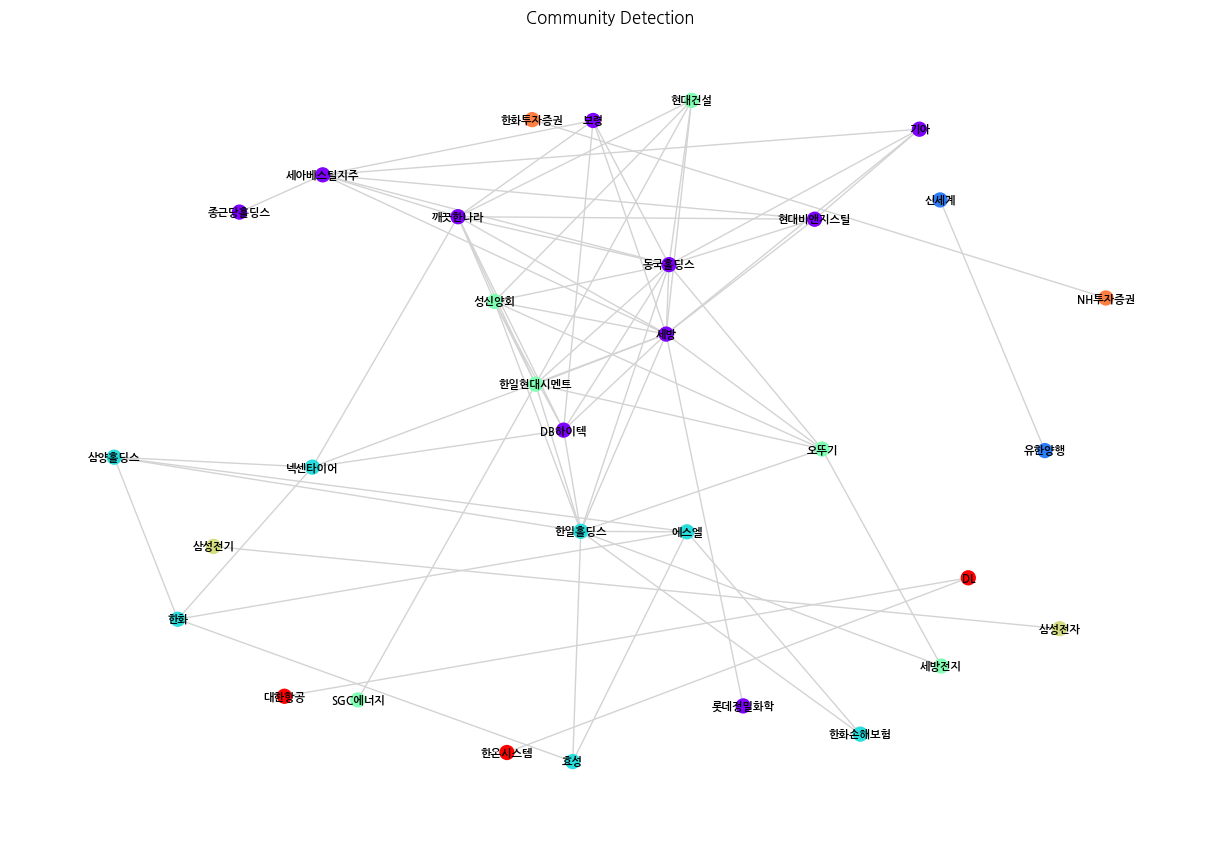

In [22]:
import community.community_louvain as community_louvain

remove_unconnected_nodes(G)

# 그래프 시각화
G = nx.relabel_nodes(G, mapping)

#first compute the best partition
partition = community_louvain.best_partition(G)

# 커뮤니티별로 노드 색상 지정
colors = [partition[node] for node in G.nodes()]

pos = nx.spring_layout(G, k=1)
plt.figure(figsize=(12, 8))

nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.rainbow, node_size=100, edge_color='lightgray', font_size=8, font_weight='bold', font_family='NanumGothic')

plt.title("Community Detection")

plt.show()

In [23]:
community_df = pd.DataFrame.from_dict(partition, orient='index', columns=['커뮤니티'])
community_df['종목명'] = community_df.index
community_df.reset_index(drop=True, inplace=True)

# 업종명 추가
community_df = community_df.merge(meta_data[['종목명', '업종명']], on='종목명')

# 커뮤니티와 업종명 카운트 피벗 테이블 생성
pivot_table = community_df.pivot_table(index='커뮤니티', columns='업종명', aggfunc='size', fill_value=0)

# 커뮤니티 이름을 "community 1", "community 2" 형식으로 변경
pivot_table.index = [f"community {i+1}" for i in range(len(pivot_table))]

pivot_table

업종명,건설업,기계,기타금융,보험,비금속광물,운수장비,운수창고업,유통업,음식료품,의약품,전기가스업,전기전자,종이목재,증권,철강금속,화학
community 1,0,0,0,0,0,1,1,0,0,3,0,1,1,0,4,2
community 2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
community 3,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,3
community 4,1,0,0,0,2,0,0,0,1,0,1,1,0,0,0,0
community 5,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
community 6,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
community 7,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Influence Maximization

In [24]:
import random

# 독립적 연접 모델을 사용한 영향 평가 함수
def independent_cascade(G, seed_nodes, steps=1000):
    influenced_nodes = set(seed_nodes)
    new_active = set(seed_nodes)
    for _ in range(steps):
        if not new_active:
            break
        next_active = set()
        for node in new_active:
            for neighbor in G.neighbors(node):
                if neighbor not in influenced_nodes and random.random() < G[node][neighbor]['weight']:
                    next_active.add(neighbor)
        influenced_nodes.update(next_active)
        new_active = next_active
    return len(influenced_nodes)

In [25]:
# Greedy Algorithm을 사용한 시드 노드 선택
def greedy_algorithm(G, k, steps=1000):
    seed_nodes = []
    for _ in tqdm(range(k)):
        best_node = None
        max_influence = -1
        for node in tqdm(G.nodes):
            if node not in seed_nodes:
                influence = independent_cascade(G, seed_nodes + [node], steps)
                if influence > max_influence:
                    best_node = node
                    max_influence = influence
        seed_nodes.append(best_node)
    return seed_nodes

In [26]:
# 시드 노드 수 설정
k = 1

# Greedy Algorithm을 사용하여 시드 노드 선택
seed_nodes = greedy_algorithm(G, k)
print(f"Selected seed nodes: {seed_nodes}")

100%|██████████| 1/1 [00:00<00:00, 32.76it/s]

Selected seed nodes: ['효성']


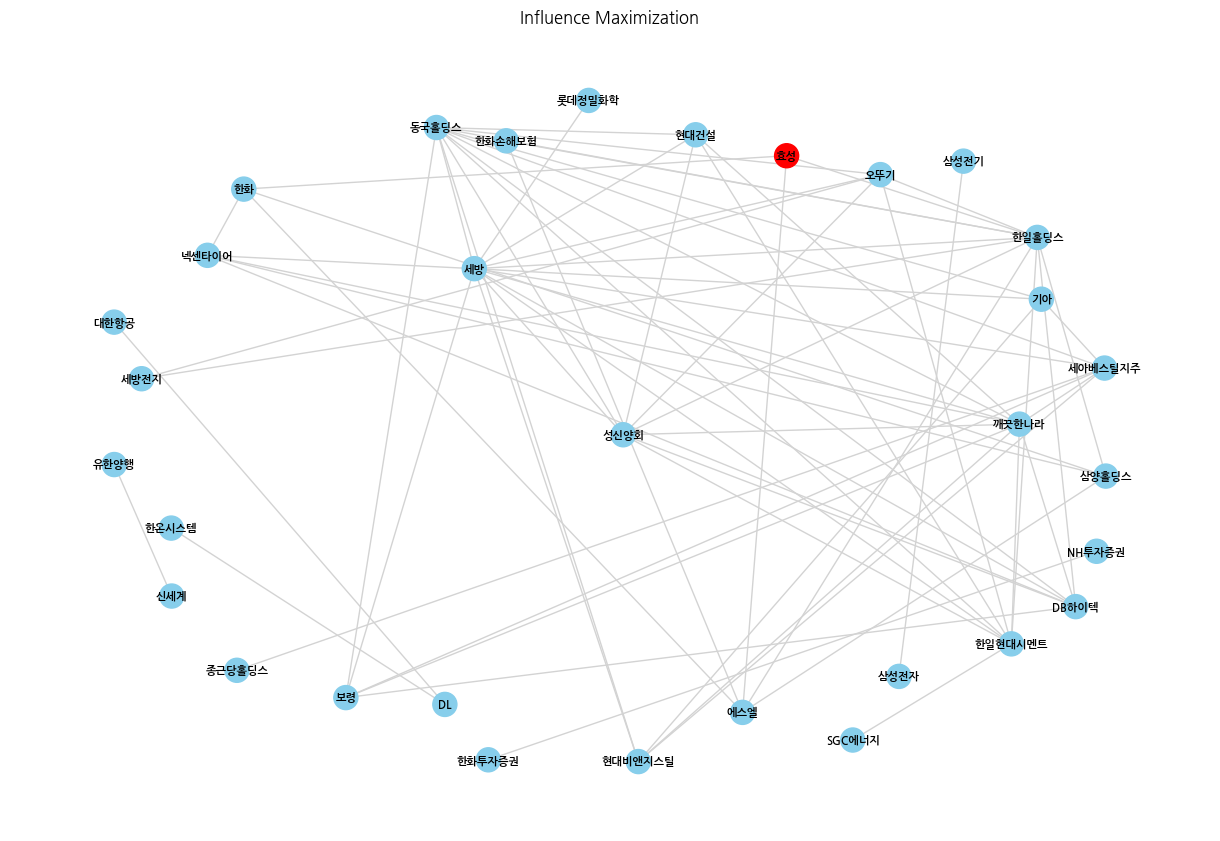

In [27]:
# 시각화 (선택된 시드 노드를 강조하여 표시)
pos = nx.spring_layout(G, k=2)
node_colors = ['red' if node in seed_nodes else 'skyblue' for node in G.nodes]

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='lightgray', node_size=300, font_size=8, font_weight='bold', font_family='NanumGothic')  # 노드 크기 조정
G = nx.relabel_nodes(G, mapping)


plt.title("Influence Maximization")
plt.show()